<a href="https://colab.research.google.com/github/aakasheyyy/End-to-End-DataScience-Titanic/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load dataset from seaborn or Kaggle
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Check the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check missing values
data.isnull().sum()

# Fill missing 'Age' with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Check the cleaned data
data.head()


/tmp/ipython-input-2067025390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-2067025390.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


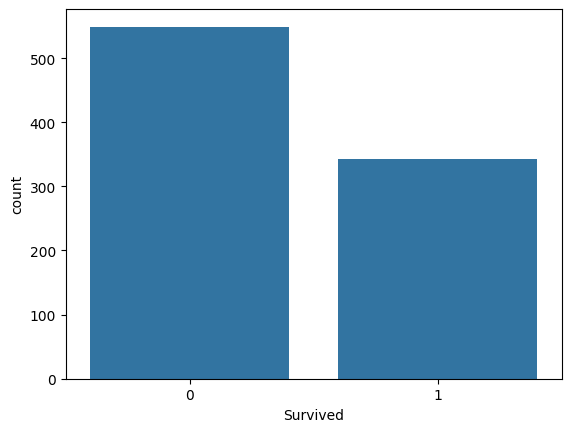

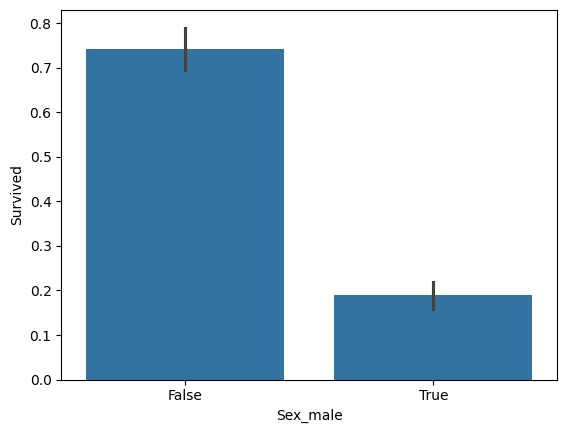

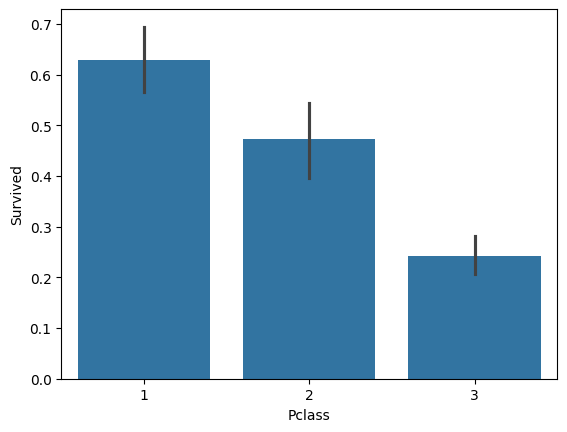

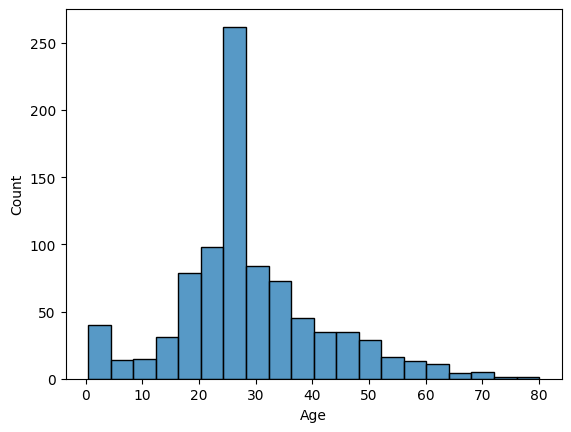

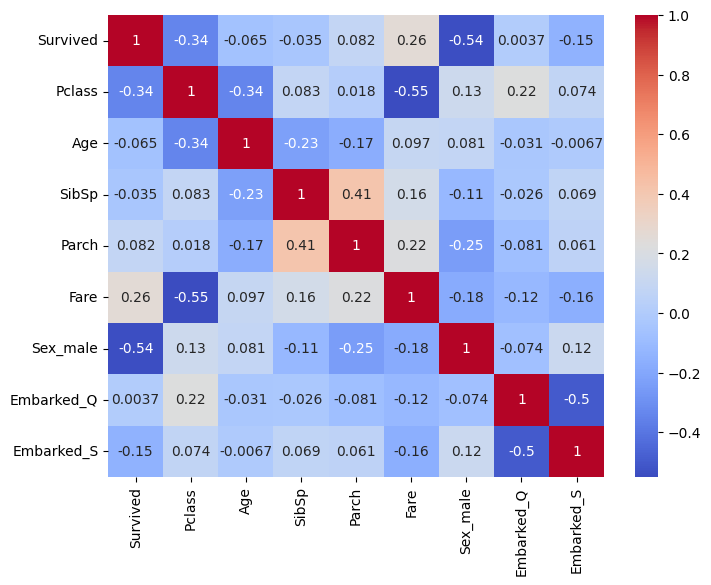

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of survived vs not survived
sns.countplot(x='Survived', data=data)
plt.show()

# Survival by Sex
sns.barplot(x='Sex_male', y='Survived', data=data)
plt.show()

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Age distribution
sns.histplot(data['Age'], bins=20)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split features and target
X = data.drop('Survived', axis=1)  # features
y = data['Survived']               # target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296

Confusion Matrix:
 [[91 14]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [9]:
!pip install flask
!pip install pyngrok


In [10]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [19]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('titanic_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input JSON
    df = pd.DataFrame([data])  # Convert to DataFrame
    prediction = model.predict(df)
    return jsonify({'Survived': int(prediction[0])})

# Start ngrok tunnel
public_url = ngrok.connect(5000)
print("Your API is live at:", public_url)

# Run the Flask app
app.run()


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: The endpoint 'https://nonstatistic-haplologic-haydee.ngrok-free.dev' is already online. Either\n1. stop your existing endpoint first, or\n2. start both endpoints with `--pooling-enabled` to load balance between them.\r\n\r\nERR_NGROK_334\r\n"}}


In [12]:
!ngrok authtoken "34kGhI30LFN2LCnri7SSRrnHWuX_3KaCKXrBxT12kKjEWypbP"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('titanic_model.pkl')

# Initialize Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input JSON

    # Define the columns in the exact order used during training
    columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

    # Convert input to DataFrame with correct column order
    df = pd.DataFrame([data], columns=columns)

    # Make prediction
    prediction = model.predict(df)
    return jsonify({'Survived': int(prediction[0])})

# Start ngrok tunnel
public_url = ngrok.connect(5000)
print("Your API is live at:", public_url)

# Run the Flask app
app.run()


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: The endpoint 'https://nonstatistic-haplologic-haydee.ngrok-free.dev' is already online. Either\n1. stop your existing endpoint first, or\n2. start both endpoints with `--pooling-enabled` to load balance between them.\r\n\r\nERR_NGROK_334\r\n"}}


In [20]:
!pkill ngrok


In [23]:
# Sample passenger input
sample_input = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,
    "Embarked_Q": 0,
    "Embarked_S": 1
}

# Use Flask test client
with app.test_client() as c:
    response = c.post('/predict', json=sample_input)
    print(response.json)


ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/flask/app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/flask/app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/flask/app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/flask/app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-1365529663.py", line 17, in predict
    prediction = model.predict(df)
                 ^^^^^^^^^^^^^^

None


In [25]:
sample_input = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,
    "Embarked_Q": 0,
    "Embarked_S": 1
}

with app.test_client() as c:
    response = c.post('/predict', json=sample_input)
    print(response.json)


{'Survived': 0}
